In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(0)

In [2]:
from sklearn.base import BaseEstimator

class Perceptron(BaseEstimator):
    def __init__(self, alpha, n_epochs):
        self.alpha = alpha
        self.n_epochs = n_epochs
        
    def fit(self, X, y):
        (n, m) = X.shape
        
        # Initialize the weights
        self.w = np.random.randn(m)
        self.b = 0
        
        # The training loop
        for epoch in range(self.n_epochs):
            n_errors = 0
            
            for i in range(n):
                o = self.predict(X[i])
                if o != y[i]:
                    self.w += self.alpha * (y[i] - o) * X[i]
                    self.b += self.alpha * (y[i] - o)
                    n_errors += 1
            
            accuracy = 1 - (n_errors / n)
            print(f'Epoch {epoch + 1}: accuracy = {accuracy:.3f}')
            
            if n_errors == 0:
                break
                
    def predict(self, X):
        z = X @ self.w + self.b
        return np.heaviside(z, 1)

In [3]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=0.5)

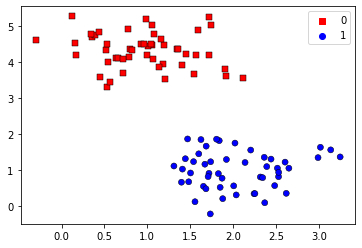

In [4]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, style=y, markers=('s', 'o'), 
                palette=('r', 'b'), edgecolor='black')
plt.savefig('figures/blobs_data.pdf')

In [5]:
perceptron = Perceptron(alpha=0.01, n_epochs=10)
perceptron.fit(X, y)

Epoch 1: accuracy = 0.250
Epoch 2: accuracy = 0.950
Epoch 3: accuracy = 1.000
